In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd

In [2]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [3]:
df = pd.concat([df1,df2])
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [4]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

df['make_encoded'] = label_encoder.fit_transform(df['make'])
df['fuel_type_encoded'] = label_encoder.fit_transform(df['fuel_type'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body_type'])
df['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])

ordinal_categories = ['great', 'good', 'fair', 'overpriced']

df['car_rating_encoded'] = ordinal_encoder.fit_transform(df[['car_rating']])


df.drop(columns=['make'], inplace=True)
df.drop(columns=['model'], inplace=True)
df.drop(columns=['rto'], inplace=True)
df.drop(columns=['fuel_type'], inplace=True)
df.drop(columns=['body_type'], inplace=True)
df.drop(columns=['car_rating'], inplace=True)
df.drop(columns=['city'], inplace=True)
df.drop(columns=['registered_city'], inplace=True)
df.drop(columns=['registered_state'], inplace=True)
df.drop(columns=['car_name'], inplace=True)
df.drop(columns=['variant'], inplace=True)
df.drop(columns=['source'], inplace=True)
df.drop(columns=['car_availability'], inplace=True)
df.drop(columns=['ad_created_on'], inplace=True)
df.drop(columns=['transmission'], inplace=True)

In [5]:
df = df.dropna(axis=0)  # Remove rows with NaNs
len(df)

4120

In [6]:
df

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,make_encoded,fuel_type_encoded,body_type_encoded,transmission_encoded,car_rating_encoded
0,1,2012,69029,364299,2068,True,True,3,363529,365029.0,True,8462,54645,False,False,14,2,3,1,2.0
4,5,2017,53648,1082011,2927,True,True,1,1119840,1125840.0,True,25132,162302,False,False,7,0,4,0,2.0
6,7,2010,59295,286399,506,True,True,2,255175,286499.0,True,6652,42960,False,False,7,2,0,1,1.0
7,8,2014,50294,283299,1281,True,True,1,280943,349654.0,True,6580,42495,False,False,14,2,0,1,2.0
9,10,2013,116848,205299,1069,True,True,1,208701,263694.0,True,4769,30795,False,False,14,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,2016,41739,537999,2610,True,True,1,548960,673053.0,True,12496,80700,True,False,14,0,3,1,2.0
6384,6385,2016,62899,528199,1826,True,True,1,520090,639270.0,True,12269,79230,True,False,14,0,3,2,2.0
6385,6386,2019,55048,380799,1657,True,True,1,364200,454738.0,True,8845,57120,True,False,14,2,0,1,2.0
6386,6387,2018,43035,315899,2559,True,True,1,283282,358430.0,True,7338,47385,True,False,20,2,0,1,1.0


In [7]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [8]:
adab_regressor = AdaBoostRegressor()
adab_regressor = adab_regressor.fit(X_train, y_train)

In [9]:
y_pred=adab_regressor.predict(X_test)

In [10]:
y_pred

array([415929.71746776, 728639.        , 255586.7348285 , ...,
       352458.88604651, 412955.95957194, 714755.93581781])

# Model Evaluation (Metrics)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mae

23969.616480078013

In [14]:
mse = mean_squared_error(y_test, y_pred)
mse

1006792618.606776

In [15]:
r2 = r2_score(y_test, y_pred)
r2

0.9873722301259443

# Graphs (Expected Value vs Actual Data)

In [16]:
import matplotlib.pyplot as plt

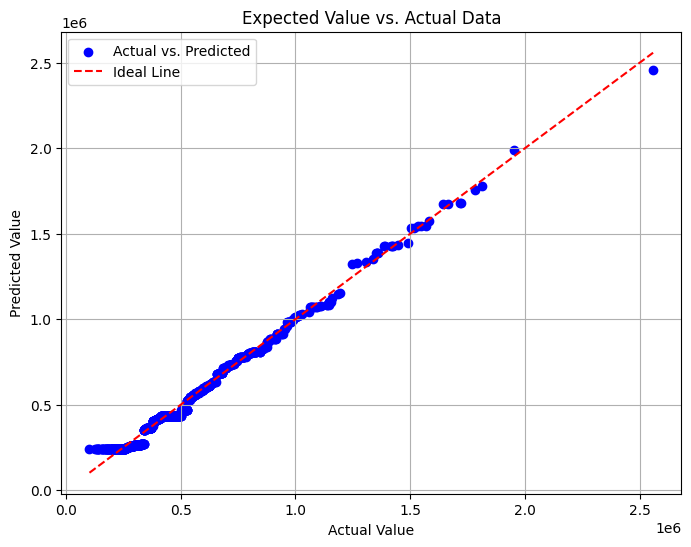

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Expected Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()